In [13]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "data" / "protest" / "topic_changes.csv")
df.head()

,topic,date,protest_count,previous_month_count,next_month_count,change,log_change
0,feminism,2014-01-03,1,3.994200,3.849557,0.963787,-0.053214
1,feminism,2014-01-04,1,4.053734,3.858657,0.951877,-0.071152
2,feminism,2014-01-28,1,3.850001,3.909790,1.015530,0.022232
3,feminism,2014-02-14,1,3.772345,3.923708,1.040124,0.056756
4,feminism,2014-02-21,1,3.968164,4.100823,1.033431,0.047442


<AxesSubplot: >

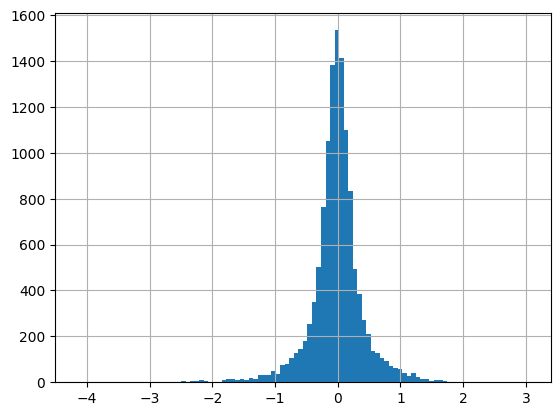

In [14]:
df["log_change"].hist(bins=100)

In [26]:
from scipy.stats import normaltest


def normaltest_(x):
    k2, p = normaltest(x, nan_policy="omit")
    print(k2, p)
    if p < 0.05:
        print("The distribution is not normal")
    else:
        print("The distribution is normal")


normaltest_(df["log_change"])

2028.3563952219665 0.0
The distribution is not normal


<AxesSubplot: >

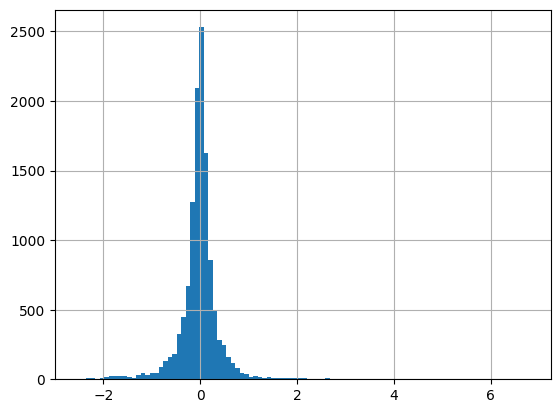

In [39]:
import numpy as np

df["difference"] = df.next_month_count - df.previous_month_count
df["difference"].hist(bins=100)

In [40]:
df["difference"].describe()

count    12435.000000
mean        -0.008553
std          0.494696
min         -2.539235
25%         -0.150424
50%         -0.007128
75%          0.122047
max          6.777160
Name: difference, dtype: float64

In [41]:
normaltest_(df["difference"])

9590.930133029724 0.0
The distribution is not normal


<AxesSubplot: >

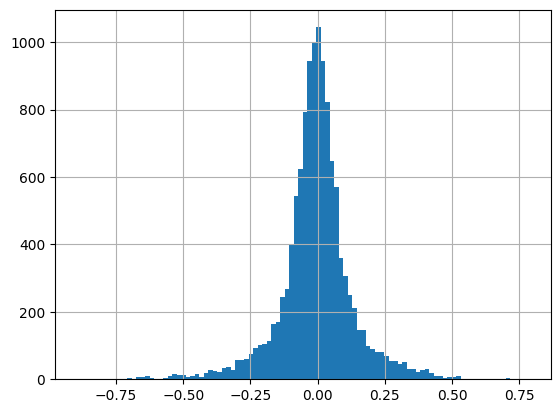

In [42]:
df["norm_difference"] = (df["next_month_count"] - df["previous_month_count"]) / (
    df["previous_month_count"] + df["next_month_count"]
)
df["norm_difference"].hist(bins=100)